# QUESTION1

Introduction:
Special thanks to: https://github.com/justmarkham for sharing the dataset and 
materials.
Occupations
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called users
Step 4. Discover what is the mean age per occupation
Step 5. Discover the Male ratio per occupation and sort it from the most to the least
Step 6. For each occupation, calculate the minimum and maximum ages
Step 7. For each combination of occupation and sex, calculate the mean age
Step 8. For each occupation present the percentage of women and men 

STEP 1 : Import the necessary libraries

In [15]:
import pandas as pd
import numpy as np

STEP 2 : Import the dataset from this address AND STEP 3 : Assign it to a variable called users.

In [16]:
users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep='|', error_bad_lines=False)
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


Step 4: Discover what is the mean age per occupation

In [17]:
mean_age = users.groupby(['occupation']).age.mean()
mean_age

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

Step 5:Discover the Male ratio per occupation and sort it from the most to the least

In [18]:
separate_gen = users.pivot_table(index='occupation', columns='gender', aggfunc='size', fill_value=0)

sums= separate_gen[['F', 'M']].sum(axis=1)
separate_gen['New column for male Ratio'] = round(100 * separate_gen['M'] / sums , 1)
p1 =separate_gen['New column for male Ratio']

p1.sort_values(ascending=False)

occupation
doctor           100.0
engineer          97.0
technician        96.3
retired           92.9
programmer        90.9
executive         90.6
scientist         90.3
entertainment     88.9
lawyer            83.3
salesman          75.0
educator          72.6
student           69.4
other             65.7
marketing         61.5
writer            57.8
none              55.6
administrator     54.4
artist            53.6
librarian         43.1
healthcare        31.2
homemaker         14.3
Name: New column for male Ratio, dtype: float64

Step 6 : For each occupation, calculate the minimum and maximum ages

In [19]:
users.groupby('occupation')['age'].agg(['min', 'max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


Step 7 : For each combination of occupation and sex, calculate the mean age

In [20]:
users.groupby(['occupation', 'gender'])['age'].mean().to_frame()

age
occupation    gender           
administrator F       40.638889
              M       37.162791
artist        F       30.307692
              M       32.333333
doctor        M       43.571429
educator      F       39.115385
              M       43.101449
engineer      F       29.500000
              M       36.600000
entertainment F       31.000000
              M       29.000000
executive     F       44.000000
              M       38.172414
healthcare    F       39.818182
              M       45.400000
homemaker     F       34.166667
              M       23.000000
lawyer        F       39.500000
              M       36.200000
librarian     F       40.000000
              M       40.000000
marketing     F       37.200000
              M       37.875000
none          F       36.500000
              M       18.600000
other         F       35.472222
              M       34.028986
programmer    F       32.166667
              M       33.216667
retired       F       70.000000
              M       62.538462
salesman      F       27.000000
              M       38.555556
scientist     F       28.333333
              M       36.321429
student       F       20.750000
              M       22.669118
technician    F       38.000000
              M       32.961538
writer        F       37.631579
              M       35.346154

Step 8 : For each occupation present the percentage of women and men

In [21]:
p = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})
q = users.groupby(['occupation']).agg('count')
occup_gender = p.div(q, level = "occupation") * 100
occup_gender.loc[: , 'gender']

occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
               M          65.714286
progra

In [22]:
occupation_gen =users.groupby(['occupation', 'gender'])['user_id'].count().rename("count")
occup_count = occupation_gen.groupby(level=0).sum()
print(occupation_gen / occup_count)

occupation     gender
administrator  F         0.455696
               M         0.544304
artist         F         0.464286
               M         0.535714
doctor         M         1.000000
educator       F         0.273684
               M         0.726316
engineer       F         0.029851
               M         0.970149
entertainment  F         0.111111
               M         0.888889
executive      F         0.093750
               M         0.906250
healthcare     F         0.687500
               M         0.312500
homemaker      F         0.857143
               M         0.142857
lawyer         F         0.166667
               M         0.833333
librarian      F         0.568627
               M         0.431373
marketing      F         0.384615
               M         0.615385
none           F         0.444444
               M         0.555556
other          F         0.342857
               M         0.657143
programmer     F         0.090909
               M         0

# Question 2

#step1-3

In [23]:
import pandas as pd
import numpy as np

euro12 = pd.read_csv(r'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')

euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


#step 4

In [24]:
euro12['Goals'] 

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

#step5: How many team participated in the Euro2012?

In [25]:
euro12.shape[0]

16

#Step6 : What is the number of columns in the dataset?

In [26]:
euro12.shape[1]

35

#Step 7 : View only the columns Team, Yellow Cards and Red Cards and assign them

In [27]:
discipline=euro12[['Team','Yellow Cards','Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


#Step8:Sort the teams by Red Cards, then to Yellow Cards

In [28]:
dis = discipline.sort_values(by='Red Cards', ascending=True)
Redcard= dis.drop(columns='Yellow Cards')
Redcard

,Team,Red Cards
0,Croatia,0
1,Czech Republic,0
2,Denmark,0
3,England,0
4,France,0
5,Germany,0
7,Italy,0
8,Netherlands,0
10,Portugal,0
12,Russia,0


In [29]:
dis = discipline.sort_values(by='Yellow Cards', ascending=True)
yellowcard= dis.drop(columns='Red Cards')
yellowcard

,Team,Yellow Cards
2,Denmark,4
5,Germany,4
3,England,5
8,Netherlands,5
15,Ukraine,5
4,France,6
11,Republic of Ireland,6
12,Russia,6
1,Czech Republic,7
9,Poland,7


Step 9:Calculate the mean Yellow Cards given per Team

In [30]:
discipline["Yellow Cards"].mean()

7.4375

Step 10:Filter teams that scored more than 6 goals

In [31]:
euro12[euro12['Goals'] >= 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
10,Portugal,6,22,42,34.3%,9.3%,82,6,0,0,...,10,71.5%,73,90,10,12,0,14,14,16
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


Step 11:Select the teams that start
with G

In [32]:
euro12[euro12.Team.str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


Step 12:Select the first 7 columns

In [33]:
euro12.iloc[:, 0:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


Step 13:Select all columns except the last 3

In [34]:
euro12[euro12.columns[0:-3]]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


Step 14: Present only the Shooting Accuracy from England, Italy and Russia

In [35]:
euro12_new = euro12.set_index('Team')
euro12_new.loc[['England', 'Italy', 'Russia'], 'Shooting Accuracy']

Team
England    50.0%
Italy      43.0%
Russia     22.5%
Name: Shooting Accuracy, dtype: object

# Question 3

Step 1:Import the necessary libraries  and Step 2: Create 3 differents Series, each of length 100, as follows:

In [36]:
import numpy as np
import pandas as pd
firstseries = pd.Series(np.random.randint(1,4,100))
secondseries = pd.Series(np.random.randint(1,3,100))
thirdseries = pd.Series(np.random.randint(10000,30000,100))

print(firstseries)
print(secondseries)
print(thirdseries)

0     2
1     3
2     2
3     3
4     3
     ..
95    1
96    2
97    1
98    1
99    2
Length: 100, dtype: int32
0     2
1     2
2     2
3     2
4     2
     ..
95    1
96    2
97    2
98    2
99    2
Length: 100, dtype: int32
0     13699
1     23367
2     15019
3     29812
4     28747
      ...  
95    15228
96    23079
97    15009
98    13903
99    18812
Length: 100, dtype: int32


Step 3: Create a DataFrame by joinning the Series by column

In [37]:
DataFrame = pd.concat([firstseries,secondseries,thirdseries],axis=1,join="inner")
DataFrame

,0,1,2
0,2,2,13699
1,3,2,23367
2,2,2,15019
3,3,2,29812
4,3,2,28747
...,...,...,...
95,1,1,15228
96,2,2,23079
97,1,2,15009
98,1,2,13903


Step 4: Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [38]:
DataFrame.columns = ["bedrs", "bathrs", "price_sqr_meter"]
DataFrame

,bedrs,bathrs,price_sqr_meter
0,2,2,13699
1,3,2,23367
2,2,2,15019
3,3,2,29812
4,3,2,28747
...,...,...,...
95,1,1,15228
96,2,2,23079
97,1,2,15009
98,1,2,13903


Step 5: Create a one column DataFrame with the values of the 3 Series and assign it
to 'bigcolumn'

In [39]:
bigcoulmn= DataFrame['bedrs'].append(DataFrame['bathrs'].append(DataFrame['price_sqr_meter']))
bigcoulmn.columns = ["bigCoulmn"]
bigcoulmn

0         2
1         3
2         2
3         3
4         3
      ...  
95    15228
96    23079
97    15009
98    13903
99    18812
Length: 300, dtype: int32

Step 6: Ops it seems it is going only until index 99. Is it true?

In [40]:
bigcoulmn.index[1:301]


Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
           dtype='int64', length=299)

Step 7:Reindex the DataFrame so it goes from 0 to 299

In [41]:
bigcoulmn.reset_index(drop=True)

0          2
1          3
2          2
3          3
4          3
       ...  
295    15228
296    23079
297    15009
298    13903
299    18812
Length: 300, dtype: int32

# Question 4

In [42]:
Step 1: Import the necessary libraries


SyntaxError: invalid syntax (<ipython-input-42-dacbb8257a65>, line 1)

In [43]:
import numpy as np
import pandas as pd
import datetime as dt

In [44]:
#step 2& 3

In [45]:
data = pd.read_csv(r'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data',sep="\s+")
data["date"]=pd.to_datetime(data[["Yr","Mo","Dy"]].astype(str).agg('-'.join,axis=1))
data=data.drop(columns=['Yr','Mo','Dy'])
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,2061-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,2061-01-02
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,2061-01-03
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,2061-01-04
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,2061-01-05


In [46]:
#step 4

In [47]:
data['date']=pd.to_datetime(data.date) + pd.offsets.DateOffset(years=-100)
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,1961-01-02
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,1961-01-03
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,1961-01-04
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,1961-01-05


In [48]:
#step5

In [49]:
datetime=data.set_index("date")
datetime.index.astype("datetime64[ns]")

DatetimeIndex(['1961-01-01', '1961-01-02', '1961-01-03', '1961-01-04',
               '1961-01-05', '1961-01-06', '1961-01-07', '1961-01-08',
               '1961-01-09', '1961-01-10',
               ...
               '1878-12-22', '1878-12-23', '1878-12-24', '1878-12-25',
               '1878-12-26', '1878-12-27', '1878-12-28', '1878-12-29',
               '1878-12-30', '1878-12-31'],
              dtype='datetime64[ns]', name='date', length=6574, freq=None)

In [50]:
#step6

In [51]:
missingValue=data.isnull().sum()
missingValue.count()

13

In [52]:
#step7

In [53]:
NonMissingValue=datetime.count()
NonMissingValue.sum()

78857

In [54]:
#step8

In [55]:
meancolumn=data.mean() #the mean of each location
meancolumn.mean()

<ipython-input-55-cf5eb5fd5962>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  meancolumn=data.mean() #the mean of each location


10.227982360836924

In [56]:
#step9

In [57]:
loc_stats=data.agg(['min','max','mean','std'])
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000,1871-01-01 00:00:00
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000,1970-12-31 00:00:00
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079,1925-07-21 09:02:08.141162240
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794,16545 days 05:22:37.238957312


In [58]:
#step10

In [59]:
day_stats=data.apply(pd.DataFrame.describe, axis=1)
day_stats


,count,unique,top,freq
0,12.0,11.0,15.04,2.0
1,12.0,12.0,9.79,1.0
2,12.0,12.0,16.88,1.0
3,13.0,13.0,1.79,1.0
4,13.0,13.0,13.25,1.0
...,...,...,...,...
6569,13.0,13.0,8.08,1.0
6570,13.0,13.0,1878-12-28 00:00:00,1.0
6571,13.0,13.0,1878-12-29 00:00:00,1.0
6572,13.0,13.0,12.46,1.0


In [60]:
#step11

In [61]:
AvgJanData = datetime[datetime.index.month == 1]
print ("January windspeeds:")
print (AvgJanData.mean())

January windspeeds:
RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64


In [62]:
#step12

In [63]:
datetime.resample('Y').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,
1871-12-31,11.273123,9.095178,11.088329,5.241507,9.440329,6.097151,8.385890,6.757315,7.915370,7.229753,12.208932,15.025233
1872-12-31,12.463962,10.561311,12.058333,5.929699,9.430410,6.358825,9.704508,7.680792,8.357295,7.515273,12.727377,15.028716
1873-12-31,11.828466,10.680493,10.680493,5.547863,9.640877,6.548740,8.482110,7.614274,8.245534,7.812411,12.169699,15.441096
1874-12-31,13.643096,11.811781,12.336356,6.427041,11.110986,6.809781,10.084603,9.896986,9.331753,8.736356,13.252959,16.947671
1875-12-31,12.008575,10.293836,11.564712,5.269096,9.190082,5.668521,8.562603,7.843836,8.797945,7.382822,12.631671,15.307863
...,...,...,...,...,...,...,...,...,...,...,...,...
1966-12-31,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967-12-31,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968-12-31,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486


In [64]:
#step13

In [65]:
datetime.resample('M').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,
1871-01-31,15.098065,13.398387,13.080000,6.364194,11.342258,7.759677,10.297419,8.350000,8.979355,8.666774,14.392581,16.360000
1871-02-28,11.724643,9.757143,10.311786,5.242143,9.676786,5.492143,8.683929,7.075000,8.272857,7.833571,12.883929,15.863214
1871-03-31,10.844839,8.243226,11.228387,5.629032,8.960000,5.486774,9.061935,6.700000,8.494516,7.758387,11.510000,15.678387
1871-04-30,9.884333,6.848000,11.187667,4.891333,8.165000,5.319000,6.688000,5.856667,7.512667,6.051333,9.014000,12.301000
1871-05-31,11.200645,8.883548,9.564839,4.888387,8.322903,5.423226,5.875806,7.230323,7.494839,7.122581,11.926129,13.107742
...,...,...,...,...,...,...,...,...,...,...,...,...
1970-08-31,9.561613,8.389677,9.485161,4.765806,8.016774,5.660323,5.986774,5.536129,6.849677,6.336129,10.348065,11.870645
1970-09-30,11.926667,12.082333,11.035333,6.509333,11.482000,7.693000,8.184000,7.921000,9.359667,8.430667,13.995333,15.865667
1970-10-31,13.354839,11.937097,11.378710,6.665806,11.728387,8.450000,10.874839,10.113871,10.560645,9.052581,15.552903,19.790323


In [66]:
#step14

In [67]:
datetime.resample('W').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,
1871-01-01,3.710000,0.790000,4.710000,0.170000,1.420000,1.040000,4.630000,0.750000,1.540000,1.080000,4.210000,9.540000
1871-01-08,15.838571,14.797143,15.425714,7.300000,11.584286,9.047143,11.267143,10.094286,9.642857,10.362857,16.547143,17.981429
1871-01-15,14.595714,15.304286,12.172857,5.447143,13.100000,9.370000,9.460000,10.072857,9.368571,8.498571,16.944286,16.010000
1871-01-22,17.547143,14.108571,13.714286,7.721429,12.595714,8.915714,10.767143,8.887143,10.092857,9.571429,13.800000,17.377143
1871-01-29,13.928571,12.567143,10.511429,5.524286,10.640000,5.627143,10.471429,5.888571,8.208571,7.734286,11.338571,14.017143
...,...,...,...,...,...,...,...,...,...,...,...,...
1970-12-06,13.422857,12.708571,10.762857,6.124286,13.160000,8.662857,11.778571,9.528571,11.261429,10.404286,17.124286,21.250000
1970-12-13,11.262857,6.815714,12.565714,4.595714,7.560000,4.710000,6.220000,4.767143,5.618571,4.037143,7.357143,12.667143
1970-12-20,12.844286,11.987143,11.392857,5.440000,10.970000,7.941429,7.821429,8.412857,8.362857,9.655714,13.708571,19.035714


In [68]:
#step15

In [69]:
y1961 = datetime[datetime.index.year == 1961]
value = datetime.resample('W').mean().apply(lambda x: x.describe())
print (value)

              RPT         VAL         ROS         KIL         SHA         BIR  \
count  942.000000  942.000000  942.000000  942.000000  941.000000  942.000000   
mean    12.363467   10.641476   11.668148    6.306536   10.447680    7.090291   
std      3.465912    3.382357    2.871446    2.199789    3.156133    2.551275   
min      3.710000    0.790000    4.710000    0.170000    1.420000    1.040000   
25%      9.978214    8.317500    9.640357    4.744643    8.214286    5.205714   
50%     12.079286   10.475000   11.497143    6.135000   10.225714    6.930714   
75%     14.685357   12.840000   13.511429    7.670000   12.594286    8.825357   
max     24.010000   23.715714   24.290000   14.517143   22.897143   16.010000   

              DUB         CLA         MUL         CLO         BEL         MAL  
count  942.000000  942.000000  942.000000  942.000000  942.000000  942.000000  
mean     9.803799    8.490573    8.492406    8.704999   13.115428   15.599256  
std      3.336377    2.846141 

# Question 5

In [70]:
#step1

In [71]:
import numpy as np
import pandas as pd

In [72]:
#step2 and step3

In [73]:
chipo = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv',sep="\t")
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [74]:
#step4

In [75]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [76]:
#step5

In [77]:
chipo.shape[0]

4622

In [78]:
#step6

In [79]:
columns=chipo.columns
len(columns)

5

In [80]:
#step7

In [81]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [82]:
#step8

In [83]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [84]:
#step9

In [85]:
mostordered=chipo.groupby(by="item_name").sum()
Sorted=mostordered.sort_values('quantity',ascending=False)
Sorted

,order_id,quantity
item_name,,
Chicken Bowl,713926,761
Chicken Burrito,497303,591
Chips and Guacamole,449959,506
Steak Burrito,328437,386
Canned Soft Drink,304753,351
Chips,208004,230
Steak Bowl,193752,221
Bottled Water,175944,211
Chips and Fresh Tomato Salsa,100419,130


In [86]:
#step10

In [87]:
Sorted.head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


In [88]:
#step11


In [89]:
orders = chipo.groupby('choice_description').sum()
orders = orders.sort_values(['quantity'], ascending=False)
orders.head(1)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


In [90]:
#step12

In [91]:
chipo.item_name.count()

4622

In [92]:
#step13

In [93]:
chipo.item_price.str.replace('$','').astype(float)
chipo['item_price'].dtype

<ipython-input-93-9b54e8c5cc1c>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  chipo.item_price.str.replace('$','').astype(float)


dtype('O')

In [94]:
chipo['item_price'].apply(lambda x: x.replace('$', '')).astype('float')

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

In [95]:
#step14

In [96]:
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
chipo
revenue = chipo.groupby(by=['order_id']).sum()
revenue.sum()

quantity    4972
dtype: int64

In [97]:
#step15

In [98]:
len(chipo.order_id.value_counts())

1834

In [99]:
#step16

In [100]:
revenue['revenue'].mean()

KeyError: 'revenue'

In [101]:
#step17

In [102]:
itemsSold=chipo.item_name.value_counts()
itemsSold.count()

50

# Question 6

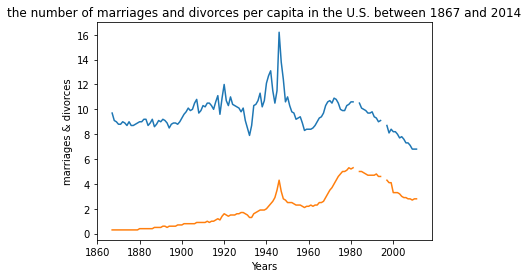

In [103]:
import pandas as pd
import matplotlib.pyplot as plib

Data = pd.read_csv('us-marriages-divorces-1867-2014.csv')
DataYears = Data['Year'].values
DataMarriages = Data['Marriages_per_1000'].values
DataDivorces = Data['Divorces_per_1000'].values

plib.plot(DataYears,DataMarriages)
plib.plot(DataYears,DataDivorces)
plib.xlabel("Years")
plib.ylabel("marriages & divorces")
plib.title("the number of marriages and divorces per capita in the U.S. between 1867 and 2014")
plib.show()

In [104]:
# question 7

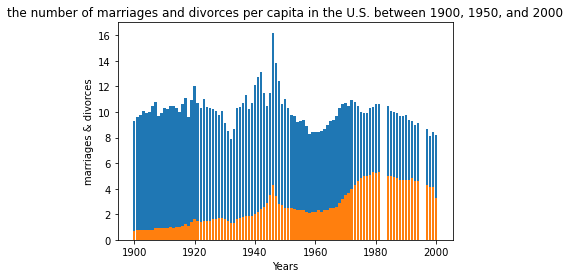

In [105]:
import numpy as np
Data1=Data.Year >= 1900
Data2=Data.Year <= 2000
NewData=Data[Data1 & Data2]

plib.bar(NewData['Year'],NewData['Marriages_per_1000'])
plib.bar(NewData['Year'],NewData['Divorces_per_1000'])

plib.xlabel("Years")
plib.ylabel("marriages & divorces")
plib.title("the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000")
plib.show()

In [106]:
# question 8

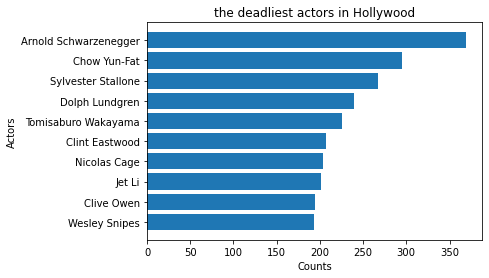

In [107]:
import pandas as pd
import matplotlib.pyplot as plib

Data = pd.read_csv('actor_kill_counts.csv')
actors = Data['Actor'].values
kills = Data['Count'].values
Data = Data.sort_values('Count')
plib.barh(Data['Actor'],Data['Count'])

plib.xlabel("Counts")
plib.ylabel("Actors")

plib.title("the deadliest actors in Hollywood")
plib.show()

In [108]:
# question 9


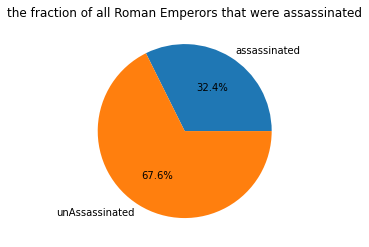

In [109]:
import pandas as pd
import matplotlib.pyplot as plib

Data = pd.read_csv('roman-emperor-reigns.csv')
Cause_of_Death = Data.Cause_of_Death.where(Data.Cause_of_Death=='Assassinated')
Assassinated = Cause_of_Death.count()
UnAssassinated = Data.Cause_of_Death.count()-Assassinated
Chart=[Assassinated,UnAssassinated]
Label=['assassinated','unAssassinated']

plib.pie(Chart,labels=Label,autopct='%.1f%%')
plib.title('the fraction of all Roman Emperors that were assassinated')
plib.show()

In [110]:
# question 10

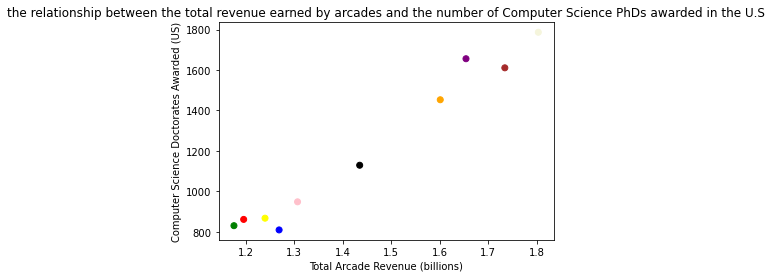

In [111]:
import pandas as pd
import matplotlib.pyplot as plib
import numpy as np

Data = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
otalRevenue = Data['Total Arcade Revenue (billions)'].values
ComputerSciencePhd = Data['Computer Science Doctorates Awarded (US)'].values
colors=np.array(["red","green","blue","yellow","pink","black","orange","purple","beige","brown"])
plib.scatter(TotalRevenue, ComputerSciencePhd,c=colors)

plib.xlabel("Total Arcade Revenue (billions)")
plib.ylabel("Computer Science Doctorates Awarded (US)")

plib.title("the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S")
colors = np.array([0, 10, 20, 30, 40, 45, 50, 55, 60, 70, 80, 90, 100])
plib.show()